In [1]:
from qiskit import __version__
print(__version__)

2.0.2


In [3]:
import numpy as np

ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [4]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 /2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [5]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [6]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### States, measurements, and operations

In [8]:
from qiskit.quantum_info import Statevector

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [9]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [10]:
display(u.is_valid())
display(w.is_valid())

True

False

Simulating measurements using "statevector"

In [11]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [18]:
outcome, state = v.measure()
print(f"Measured: {outcome} \nPost-measurement state:")
display(state.draw("latex"))

Measured: 1 
Post-measurement state:


<IPython.core.display.Latex object>

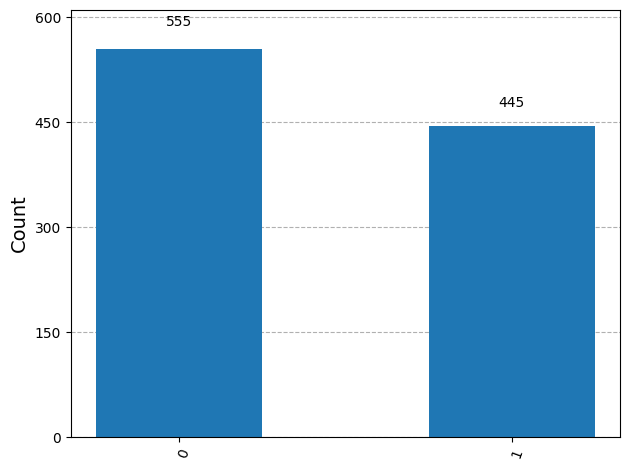

In [25]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)


Performing operations with "Operator" and "Statevector"


In [26]:
from qiskit.quantum_info import Operator
from numpy import sqrt

Y= Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [27]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v= v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

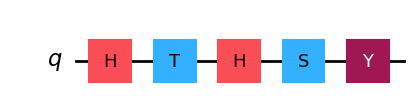

In [29]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [30]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [34]:
ket0 = Statevector([1, 0])
v0 = ket0.evolve(circuit)
display(v0.draw("latex"))

<IPython.core.display.Latex object>

In [35]:
ket1 = Statevector([0, 1])
v1 = ket1.evolve(circuit)
display(v1.draw("latex"))

<IPython.core.display.Latex object>

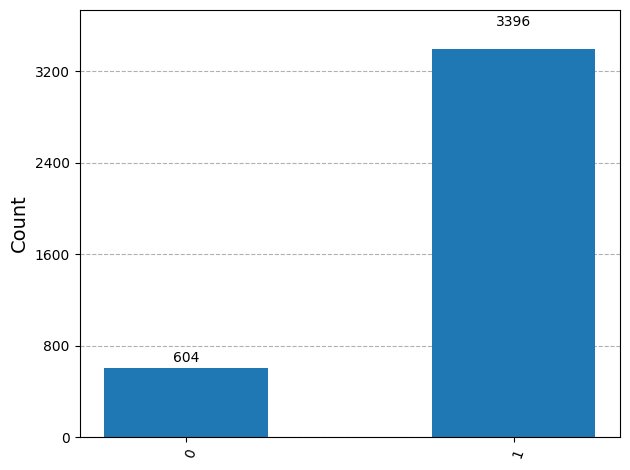

In [36]:
statistics = v0.sample_counts(4000)
display(plot_histogram(statistics))

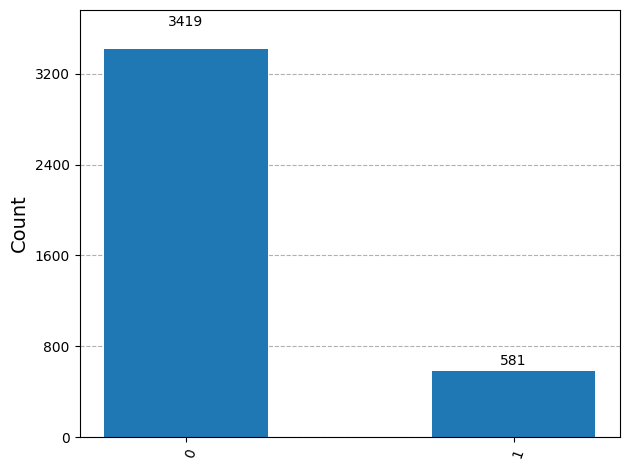

In [37]:
statistics1 = v1.sample_counts(4000)
display(plot_histogram(statistics1))